# Exercício 1
## LEIA COM ATENÇÃO

__Responsabilidades:__ Na celular logo abaixo, preencha o seu nome e rm do grupo dentro da variavel adequados, no tipo *STRING*. A falta disso na entrega final resultara em nota zero.

__Objetivos:__  As tarefas deste exercício são pensadas como um primeiro contato do estudante com programação para computação quântica utilizando a biblioteca qiskit. Particularmente, ao completar esta sequência de tarefas, o estudante será capaz de:

* Inicializar e importar as bibliotecas necessárias
* Escolher adequadamente um simulador local para executar o circuito a ser construído
* Construir um circuito quântico muito simples
* Visualizar dos resultados das medidas do circuito de diferentes maneiras
* Obter informação sobre a computação através dos resultados das medidas em um computador quântico.

__Avaliação__

Tão importante quanto escrever um código que funcione corretamente é escrever um código legível, que seja fácil de entender e possa ser facilmente reutilizado por outros ou por você mesmo. Por isso a avaliação é separada da seguinte forma:

* 60% conteúdo, se os resultados estão corretos.
* 40% apresentação, código bem comentado, cédulas texto bem escritas.

# IMPORTANTE:
 A entrega da prova deve seguir o seguinte formato: {número de registro do aluno}_{número de registro do segundo aluno}_cp1.ipynb, com a extensão .ipynb indicando que se trata de um arquivo do Jupyter Notebook. Por exemplo, se o seu número de registro é rm12345 e o de um amigo é rm23456, o arquivo entregue deve ter o nome 12345_23456_cp2.ipynb.

# DADOS DO GRUPO

In [22]:
nome1 = "Arthur Colombo Cordeiro"
rm1 = "551262"
nome2 = "Vitor Guido Kallas"
rm2 = "551067"

## Parte 1: Inicializado qiskit

### Tarefa 1:
 Usa a próxima célula de código para importar as bibliotecas básicas da Qiskit que são necessárias para construir, executar num simulador local e visualizar os resultados.

In [23]:
from qiskit import QuantumCircuit #Pacote para construir
from qiskit_aer import AerSimulator #pacote para simulaçôes

from qiskit.quantum_info import Statevector #Pacote para criar um estado quantico
import numpy as np #Pacote para contas

from qiskit.visualization import plot_histogram #Pacote para visualização em gráfico de barras
from qiskit.visualization import plot_bloch_multivector #Pacote para visualização em um Esfera de Bloch

### Tarefa 2:
Selecione um simulador apropriado para o circuito que vai construir.

In [148]:
backend = AerSimulator()

## Parte 2: Seu primeiro q-bit

### Tarefa 3:
Considere o estado:

$$ |-\rangle = \frac{1}{\sqrt 2}(|0\rangle - |1\rangle) $$

Construa um circuito quântico que tenha o estado $ |-\rangle $ como saída. Obtenha o estado de saída da execução do circuito quântico no simulador e imprima sua representação em _LaTeX_ e na _esfera de Bloch_.


In [147]:

qc = QuantumCircuit(1)

qc.h(0)
qc.z(0)

backend = AerSimulator()
job = backend.run(qc, shot=2)
result = job.result()
counts = result.get_counts()
display(counts.draw('latex'))


QiskitError: 'No counts for experiment "0"'

<IPython.core.display.Latex object>

### Tarefa 4: 
Do circuito da tarefa 3, obtenha a contagem de medidas na base computacional $ \{|0\rangle, |1\rangle \} $ e faça o histograma dos resultados.  

### Tarefa 5
É possível deduzir que o estado de saída é o estado $ |-\rangle $ a partir das medidas da Tarefa 4? Explique.   

Sua reposta aqui.

### Tarefa 6
Construa um novo circuito que gere o estado $ |+\rangle $ ou o estado $ |-\rangle$ aleatóriamente.

In [167]:
qc = QuantumCircuit(1)#Cria o novo circuito
qc.h(0)

qc.measure_all()

backend = AerSimulator()

job = backend.run(qc, shots=1)#Código que faz uma simulação das contas para gerar um estado Ket + ou Ket -

result = job.result()
counts = result.get_counts()



### Tarefa 7
Complete o circuito da Tarefa 6 fazendo com que o resultado da medida seja $|0\rangle$ se o estado gerado for $|+\rangle $, ou $|1\rangle$ se o estado gerado for $|-\rangle$. Imprima uma mensagem dizendo qual foi o estado gerado pelo circuito.

In [168]:
if '0' in counts:
    display('∣+⟩')
else:
    display('∣-⟩')

'∣-⟩'

## Parte 3: Representação na esfera de Bloch

### Tarefa 8:
Considere um estado quântico $|\psi\rangle$ de um q-bit dado por:

$$ |\psi\rangle = c_0 |0\rangle + c_1 |1\rangle ,$$ 

onde $ c_0 $ e $ c_1 $ são coeficientes complexos. Mostre que este estado pode ser escrito em termos de dois ângulos na forma:

$$ |\psi\rangle = \cos \frac{\theta}{2} |0\rangle + e^{\imath \varphi} \sin \frac{\theta}{2} |1\rangle. $$



------------------------------
Normalização do estado:
O estado $|\psi\rangle$ deve ser normalizado, ou seja, $ \langle \psi | \psi \rangle = 1 $. Assim,
\begin{align*}
\langle \psi | \psi \rangle &= (c_0^* \langle 0| + c_1^* \langle 1|)(c_0 |0\rangle + c_1 |1\rangle) \
&= |c_0|^2 \langle 0 | 0 \rangle + c_0^* c_1 \langle 0 | 1 \rangle + c_1^* c_0 \langle 1 | 0 \rangle + |c_1|^2 \langle 1 | 1 \rangle \
&= |c_0|^2 + |c_1|^2 = 1,
\end{align*}
onde usamos que $\langle 0 | 0 \rangle = \langle 1 | 1 \rangle = 1$ e $\langle 0 | 1 \rangle = \langle 1 | 0 \rangle = 0$.

Escolhendo os ângulos $\theta$ e $\varphi$:
Agora, podemos escolher $\theta$ e $\varphi$ de forma que:

$c_0$ = $\cos \frac{\theta}{2}$
e
$c_1$ = $e^{\imath \varphi} \sin \frac{\theta}{2} |1\rangle$

Substituição nos coeficientes:
Substituímos $c_0$ e $c_1$ na expressão original de $|\psi\rangle$:
\begin{align*}
|\psi\rangle &= \cos \frac{\theta}{2} |0\rangle + e^{\imath \varphi} \sin \frac{\theta}{2} |1\rangle.
\end{align*}

Dessa forma, mostramos que o estado $|\psi\rangle$ pode ser escrito na forma desejada com os ângulos $\theta$ e $\varphi$ definidos como acima. A escolha específica desses ângulos depende dos valores de $c_0$ e $c_1$, e a normalização do estado garante que essa representação seja válida.

-----------------------------------

### Tarefa 9

Escreva um código que sorteia um estado aleatório de um q-bit, imprima o estado, seu vetor de Bloch e a representação na esfera de Bloch deste estado. Dica: use a equação da esfera de bloch para gerar isso. 

<IPython.core.display.Latex object>


O vetor de Bloch é: 

x= 0.023957641927012715 
y= -0.007185559139905908 
z= 0.9996871506292075


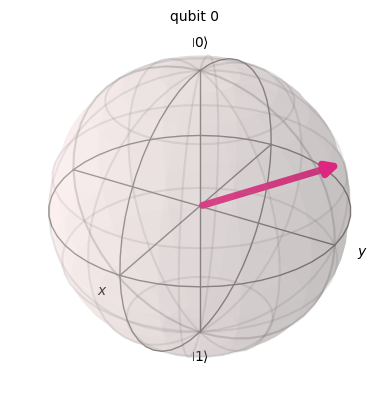

In [121]:
import random as rd
#Vetores para o ket Random
θ = rd.uniform(0, np.pi)
ϕ = rd.uniform(0, 2*np.pi)

ket_rand = Statevector(
    [np.cos(θ/2),np.exp(ϕ*1.j)*np.sin(θ/2)])

display(ket_rand.draw("latex"))

x = np.sin(theta) * np.cos(phi)  #
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

print("\nO vetor de Bloch é: \n"'\nx=',x,'\ny=',y,'\nz=',z)

plot_bloch_multivector(ket_rand)# Ket Randomico na Esfera de Bloch

### Tarefa 10:
1. Sorteie um estado de 1 um q-bit,
2. Construa um circuito quântico com 6 q-bits e inicialize todos os q-bits com o estado sorteado.
3. Aplique um rotação em torno do eixo $z$ de $n \frac{\pi}{6}$ ao n-ésimo q-bit.
4. Imprima a representação na esfera de Bloch do estado de cada um dos q-bits. Ou seja, impriva todos os $6$ qubits rotacionados.

In [7]:
from qiskit.quantum_info import Operator # Biblioteca que faz as rotações

for _ in range(6):#Repete o processo de aleatorização 6 vezes
    a = rd.uniform(0, 2*np.pi)
    b = rd.uniform(0, np.pi)
    n = 1
    theta = n * np.pi / 6

    ketA = Statevector([np.cos(a/2), np.exp(b*1.j)*np.sin(a/2)])#Cria Ket A
    Rotação = np.array([[np.exp(-1j*theta/2), 0],#Código responsável pela rotação dos eixos
                        [0, np.exp(1j*theta/2)]])
    
    operador = Operator(Rotação)
    ketR = ketA.evolve(operador, qargs=[n-1])
    display(ketR.draw("latex"))
 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

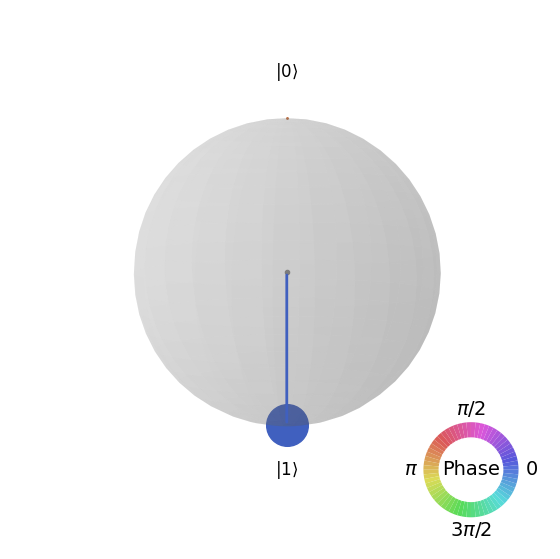

In [6]:
from qiskit.visualization import plot_state_qsphere #Biblioteca responsável pela vizualização da  esfera
plot_state_qsphere(ketR.data)

### Tarefa 11
Um estado qualquer de 1 q-bit, pode ser inicializado a partir do estado $|0\rangle$ com uma rotação em torno de eixo $\hat{x}$ ou $\hat{y}$, seguida de uma rotação no eixo $\hat{z}$. Sorteie um estado aleatoriamente e use este método para produzi-lo com um circuito quântico a partir do estado padrão de inicialização do circuito $|0\rangle$.  

In [183]:
theta = np.pi / 4
phi = np.pi / 3

qc = QuantumCircuit(1)

qc.rx(theta, 0) #Rotação em torno de x
qc.ry(2 * theta, 0)  # Rotação em torno de y
qc.rz(2 * phi, 0)  # Rotação em torno de z

backend = AerSimulator()  # Usar o simulador Aer
job = backend.run(qc, shots=1)  # Executar o circuito com uma única shot
result = job.result()

qc.draw()#Desenho do circuito


┌─────────┐┌─────────┐┌──────────┐
q: ┤ Rx(π/4) ├┤ Ry(π/2) ├┤ Rz(2π/3) ├
   └─────────┘└─────────┘└──────────┘

### Tarefa 12: 
a) Sorteie um estado aleatoriamente e calcule seu vetor de Bloch.

b) use o método da tarefa 11 para produzi-lo em um circuito quântico.

c) save o estado produzido e para poder certificar-se que ele correto mais tarde.

d) Verifique se os resultados medidos coincidem com o calculado no item a)

In [198]:
import random as rd
from qiskit.quantum_info import Statevector
# a
theta = rd.uniform(0,np.pi)
phi = rd.uniform(0,2*np.pi)

ket_random = Statevector([np.cos(theta/2),np.exp(phi*1.j)*np.sin(theta/2)]) #Criação do Ket Random

x = np.sin(theta) * np.cos(phi) #Calculo do vetor x
y = np.sin(theta) * np.sin(phi) #Calculo do vetor y
z = np.cos(theta)               #Calculo do vetor z

print("\nO vetor de Bloch é: \n"'\nx=',x,'\ny=',y,'\nz=',z)

#b

qc.rx(theta, 0) # Rotação em torno de x
qc.ry(2 * theta, 0)  # Rotação em torno de y
qc.rz(2 * phi, 0)  # Rotação em torno de z

backend = AerSimulator()  # Usar o simulador Aer
job = backend.run(qc, shots=1)  # Executar o circuito com uma única shot
result = job.result()

qc.draw()

#c

qc.save_statevector

#d

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

print("\nO vetor de Bloch é: \n"'\nx=',x,'\ny=',y,'\nz=',z)
print("\nSim, os valores estão iguais")


O vetor de Bloch é: 

x= -0.11088742759206262 
y= -0.7483811213530353 
z= 0.6539339994253157


ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)